Dataset from [here](https://www.kaggle.com/shivamb/netflix-shows)

Inspiration from one of my fav Kagglers [here](https://www.kaggle.com/subinium/storytelling-with-data-netflix-ver)

**Different from the previous EDA and Viz, we will try to tell a story this time.**

There will be a new library

Missingno: offers a nice way to visualize the distribution of NaN values. It is compatible with Pandas. Read more [here](https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/)

In [85]:
# Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno


In [86]:
# Setting some parameters

plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300
sns.set_style('whitegrid')


In [87]:
df = pd.read_csv("netflix_titles.csv")
print (df.shape)
df.head(5)

(6234, 12)


show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

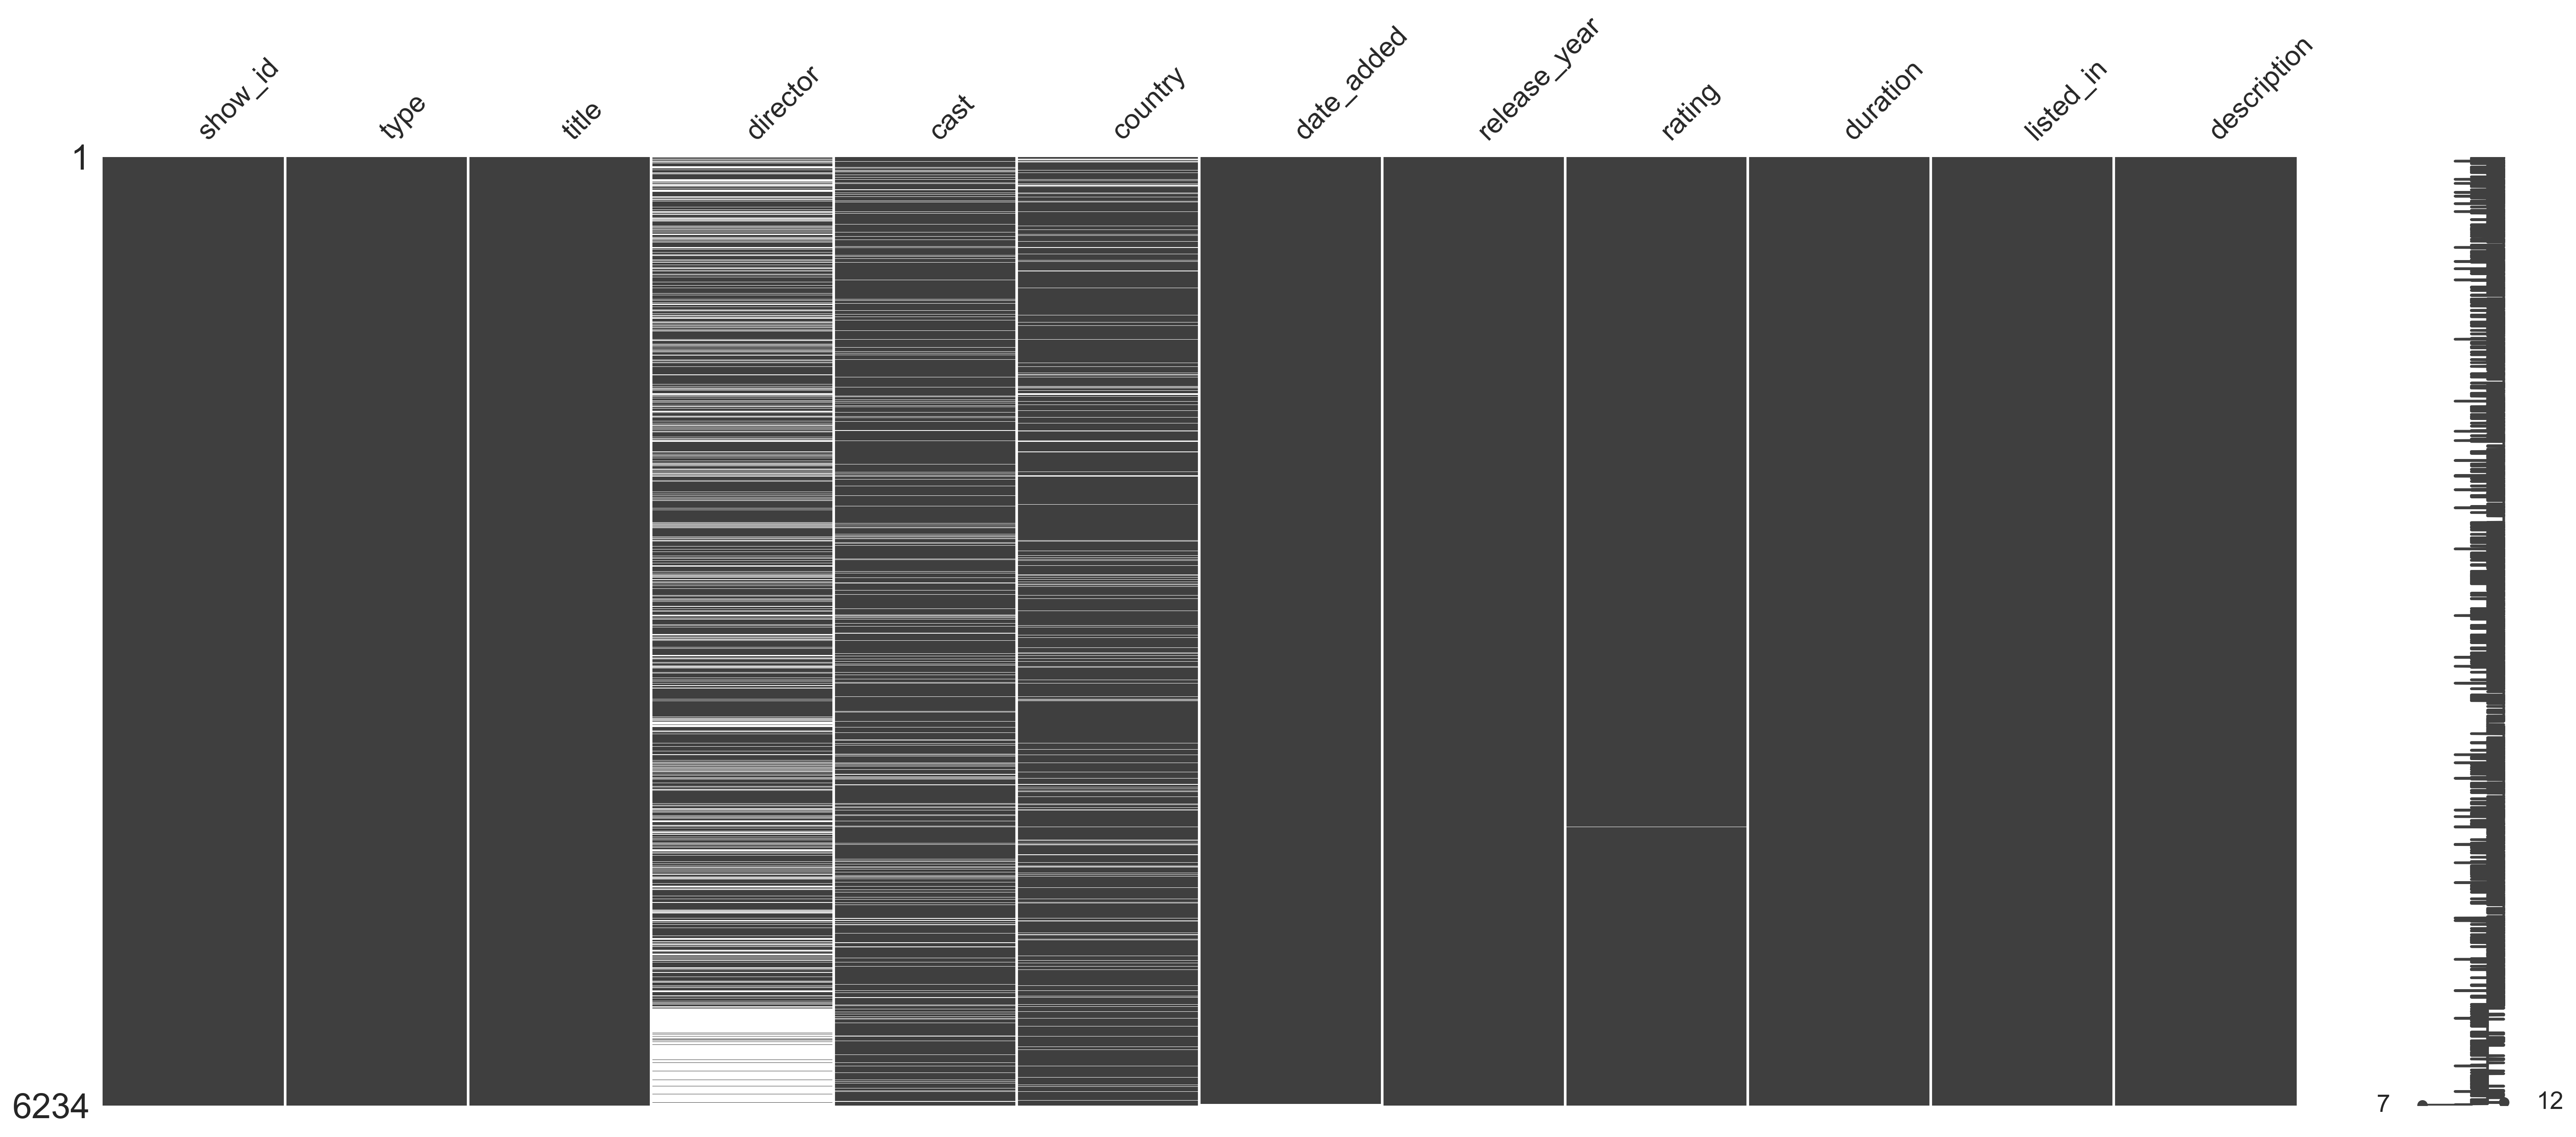

In [88]:
# Visualize how many NaN values we have

msno.matrix(df)
plt.show()

In [89]:
# Print exact percentage of NaN rate

for i in df.columns:
    null_rate = df[i].isna().sum() / len(df)
    null_percent = null_rate * 100
    if null_percent > 0:
        print (f"{i}'s null rate: {null_percent}%") # Using fstrings 


director's null rate: 31.584857234520374%
cast's null rate: 9.143407122232915%
country's null rate: 7.635547000320821%
date_added's null rate: 0.17645171639396856%
rating's null rate: 0.16041065126724416%


In [90]:
# include: 'all' will include all columns of the dataframe
df.describe(include = 'all')

show_id   type title                director                cast  \
count   6.234000e+03   6234  6234                    4265                5664   
unique           NaN      2  6172                    3301                5469   
top              NaN  Movie  Love  Raúl Campos, Jan Suter  David Attenborough   
freq             NaN   4265     3                      18                  18   
mean    7.670368e+07    NaN   NaN                     NaN                 NaN   
std     1.094296e+07    NaN   NaN                     NaN                 NaN   
min     2.477470e+05    NaN   NaN                     NaN                 NaN   
25%     8.003580e+07    NaN   NaN                     NaN                 NaN   
50%     8.016337e+07    NaN   NaN                     NaN                 NaN   
75%     8.024489e+07    NaN   NaN                     NaN                 NaN   
max     8.123573e+07    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            5758             6223    6234.00000   6224      6234   
unique            554             1524           NaN     14       201   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2032              122           NaN   2027      1321   
mean              NaN              NaN    2013.35932    NaN       NaN   
std               NaN              NaN       8.81162    NaN       NaN   
min               NaN              NaN    1925.00000    NaN       NaN   
25%               NaN              NaN    2013.00000    NaN       NaN   
50%               NaN              NaN    2016.00000    NaN       NaN   
75%               NaN              NaN    2018.00000    NaN       NaN   
max               NaN              NaN    2020.00000    NaN       NaN   

            listed_in                                        description  
count            6234                                               6234  
unique            461                                               6226  
top     Documentaries  A surly septuagenarian gets another chance at ...  
freq              299                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [91]:
# Transpose the summary table

df.describe(include='all').transpose()

count unique                                                top  \
show_id       6234    NaN                                                NaN   
type          6234      2                                              Movie   
title         6234   6172                                               Love   
director      4265   3301                             Raúl Campos, Jan Suter   
cast          5664   5469                                 David Attenborough   
country       5758    554                                      United States   
date_added    6223   1524                                    January 1, 2020   
release_year  6234    NaN                                                NaN   
rating        6224     14                                              TV-MA   
duration      6234    201                                           1 Season   
listed_in     6234    461                                      Documentaries   
description   6234   6226  A surly septuagenarian gets another chance at ...   

              freq         mean         std     min          25%          50%  \
show_id        NaN  7.67037e+07  1.0943e+07  247747  8.00358e+07  8.01634e+07   
type          4265          NaN         NaN     NaN          NaN          NaN   
title            3          NaN         NaN     NaN          NaN          NaN   
director        18          NaN         NaN     NaN          NaN          NaN   
cast            18          NaN         NaN     NaN          NaN          NaN   
country       2032          NaN         NaN     NaN          NaN          NaN   
date_added     122          NaN         NaN     NaN          NaN          NaN   
release_year   NaN      2013.36     8.81162    1925         2013         2016   
rating        2027          NaN         NaN     NaN          NaN          NaN   
duration      1321          NaN         NaN     NaN          NaN          NaN   
listed_in      299          NaN         NaN     NaN          NaN          NaN   
description      3          NaN         NaN     NaN          NaN          NaN   

                      75%          max  
show_id       8.02449e+07  8.12357e+07  
type                  NaN          NaN  
title                 NaN          NaN  
director              NaN          NaN  
cast                  NaN          NaN  
country               NaN          NaN  
date_added            NaN          NaN  
release_year         2018         2020  
rating                NaN          NaN  
duration              NaN          NaN  
listed_in             NaN          NaN  
description           NaN          NaN

In [92]:
# Create a new 'year_added' column using 'date_added' column
# date_added has NaN values, we will have to convert those

df = df.fillna('NULL')
df['year_added'] = df['date_added'].apply(lambda x : x.split(',')[-1]) # take only the year. drop "Janurary 1"
df['year_added'] = df['year_added'].apply(lambda x: x if x!= 'NULL' else '2020') # conditions for lambda function
df['year_added'] = df['year_added'].apply(int) # convert the string to integer

In [93]:
df['date_added'].head()

0    September 9, 2019
1    September 9, 2016
2    September 8, 2018
3    September 8, 2018
4    September 8, 2017
Name: date_added, dtype: object

In [94]:
df['year_added'].head()

0    2019
1    2016
2    2018
3    2018
4    2017
Name: year_added, dtype: int64

In [95]:
# Show movie and tv_show data

movie = df[df.type == "Movie"]
tv_show = df[df.type == "TV Show"]
tv_show

show_id     type                                        title director  \
2     70234439  TV Show                           Transformers Prime     NULL   
3     80058654  TV Show             Transformers: Robots in Disguise     NULL   
5     80163890  TV Show                                      Apaches     NULL   
8     80117902  TV Show                                 Fire Chasers     NULL   
26    80244601  TV Show                              Castle of Stars     NULL   
...        ...      ...                                          ...      ...   
6228  80159925  TV Show                                     Kikoriki     NULL   
6229  80000063  TV Show                                 Red vs. Blue     NULL   
6230  70286564  TV Show                                        Maron     NULL   
6232  70281022  TV Show  A Young Doctor's Notebook and Other Stories     NULL   
6233  70153404  TV Show                                      Friends     NULL   

                                                   cast         country  \
2     Peter Cullen, Sumalee Montano, Frank Welker, J...   United States   
3     Will Friedle, Darren Criss, Constance Zimmer, ...   United States   
5     Alberto Ammann, Eloy Azorín, Verónica Echegui,...           Spain   
8                                                  NULL   United States   
26    Chaiyapol Pupart, Jintanutda Lummakanon, Worra...            NULL   
...                                                 ...             ...   
6228                                      Igor Dmitriev            NULL   
6229  Burnie Burns, Jason Saldaña, Gustavo Sorola, G...   United States   
6230  Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...   United States   
6232  Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...  United Kingdom   
6233  Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...   United States   

             date_added  release_year    rating    duration  \
2     September 8, 2018          2013  TV-Y7-FV    1 Season   
3     September 8, 2018          2016     TV-Y7    1 Season   
5     September 8, 2017          2016     TV-MA    1 Season   
8     September 8, 2017          2017     TV-MA    1 Season   
26    September 7, 2018          2015     TV-14    1 Season   
...                 ...           ...       ...         ...   
6228               NULL          2010      TV-Y   2 Seasons   
6229               NULL          2015        NR  13 Seasons   
6230               NULL          2016     TV-MA   4 Seasons   
6232               NULL          2013     TV-MA   2 Seasons   
6233               NULL          2003     TV-14  10 Seasons   

                                              listed_in  \
2                                              Kids' TV   
3                                              Kids' TV   
5     Crime TV Shows, International TV Shows, Spanis...   
8                       Docuseries, Science & Nature TV   
26    International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
6228                                           Kids' TV   
6229  TV Action & Adventure, TV Comedies, TV Sci-Fi ...   
6230                                        TV Comedies   
6232           British TV Shows, TV Comedies, TV Dramas   
6233                     Classic & Cult TV, TV Comedies   

                                            description  year_added  
2     With the help of three human allies, the Autob...        2018  
3     When a prison ship crash unleashes hundreds of...        2018  
5     A young journalist is forced into a life of cr...        2017  
8     As California's 2016 fire season rages, brave ...        2017  
26    As four couples with different lifestyles go t...        2018  
...                                                 ...         ...  
6228  A wacky rabbit and his gang of animal pals hav...        2020  
6229  This parody of first-person shooter games, mil...        2020  
6230  Marc Maron stars as Marc Maron,

Netflix have been dominating the streaming industry for a long while however in recent years there are more rivals such as Disney+ etc

Ignoring the competition, lets look at the timeline of Netflix's growth

Timeline of events can be obtained from [Wiki](https://en.wikipedia.org/wiki/Timeline_of_Netflix)

**Pandas Functions**

- [Unstack](https://nikgrozev.com/2015/07/01/reshaping-in-pandas-pivot-pivot-table-stack-and-unstack-explained-with-pictures/)
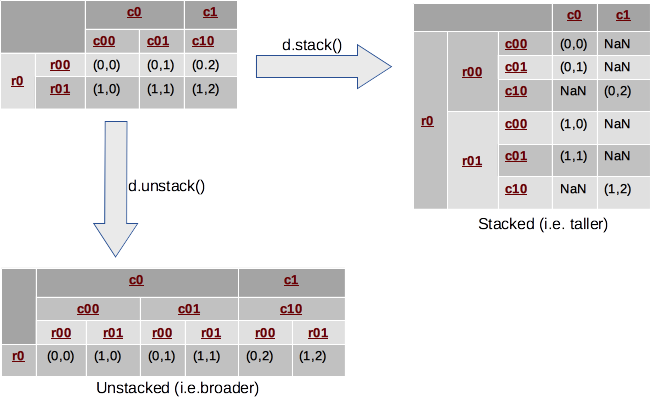


Year Data:2008       2
2009       2
2010       1
2011      13
2012       7
2013      12
2014      25
2015      90
2016     456
2017    1300
2018    1782
2019    2349
Name: year_added, dtype: int64
Type Data:type         Movie  TV Show
year_added                 
2008           1.0      1.0
2009           2.0      0.0
2010           1.0      0.0
2011          13.0      0.0
2012           4.0      3.0
2013           6.0      6.0
2014          19.0      6.0
2015          58.0     32.0
2016         264.0    192.0
2017         913.0    387.0
2018        1290.0    492.0
2019        1546.0    803.0


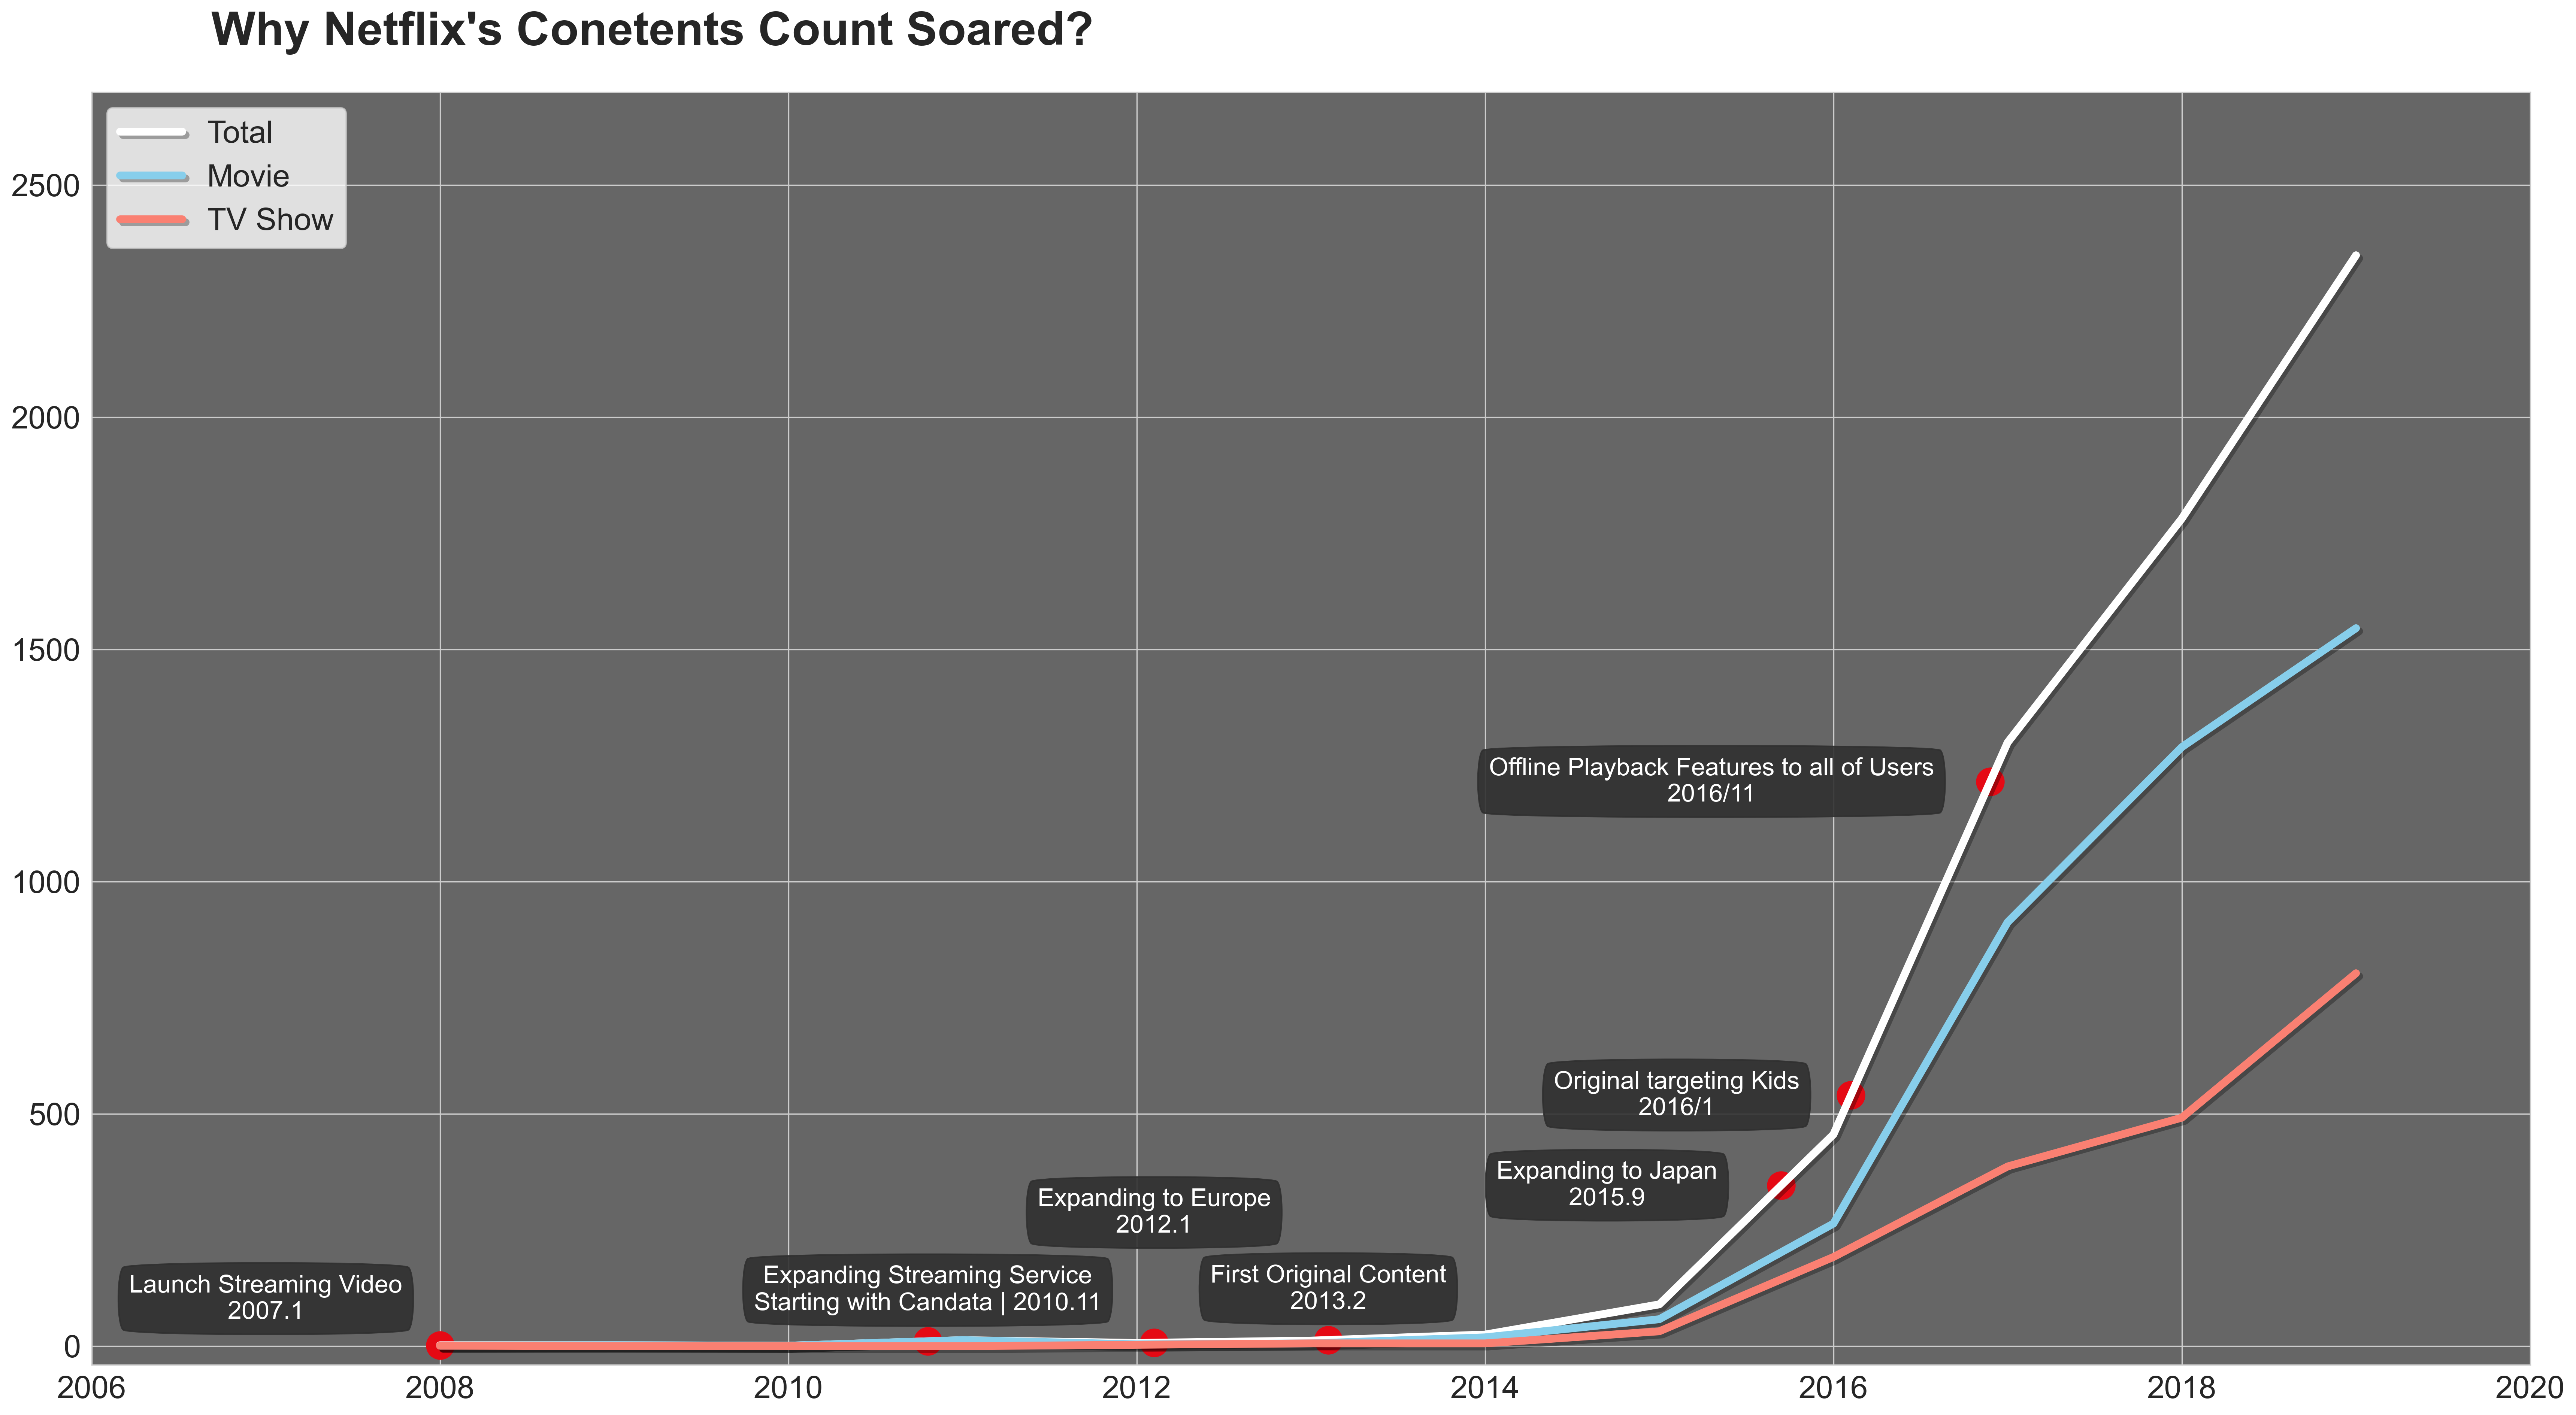

In [96]:
import matplotlib.patheffects as path_effects

# value counts is used to get a Series containing counts of unique values
## by default the most frequency values will be sorted in descending order however we use sort_index()
## to make it ascending

year_data = df['year_added'].value_counts().sort_index().loc[:2019]

# Group whole df by 'type' column: Movie or TV show
## index out 'year_added' column of the df
## count the numbers of occurences

type_data = df.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).transpose().loc[:2019] 

print (f"Year Data:{year_data}")
print (f"Type Data:{type_data}")

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [ 
    100,
    110,
    280,
    110,
    0,
    0,
    0
]

left_right = [
    -1,
    -0,
    -0,
    -0,
    -1,
    -1,
    -1.6,
    
]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

Based on this chart, there is a slight growh between 2015-2016 however from 2016 onwards the growth for Movie and TV Show has been increasing rapidly/exponentially.

A possible observation would be, after each expansion to a new country/region, Netflix will be producing more Movies and TV Shows using the local actors there. This helps to attract the locals of that country/region thereby increasing Netflix viewership and revenue. 

In doing so, it allows Netflix to keep producing quality TV Shows and Movies for different group of audiences. 

Next we will be comparing the amount of TV Shows and Movies each country produced. 

In [97]:
# Use Counter function to create a dict class to count objects
from collections import Counter
country_data = df['country']

## Complicated
country_counting = pd.Series(dict(Counter(','.join(country_data).replace
(',', ',').replace(',', ',').split(',')))).sort_values(ascending = False)

country_counting.drop(['NULL'], axis = 0, inplace = True)

Let's count on the other side for a moment, and using the Pareto principle(80/20 rule) can help visualize the data

In [98]:
total = sum(country_counting)
top20 = sum(country_counting[:22]) # 22 is real 20% 

print(f'total : {total}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{total} = {100 * top20/total}')

total : 7182
top 20 countries : 5839
percentage : 5839/7182 = 81.30047340573657


## Bar Graph

In [99]:
top20_country = country_counting[:20]
top20_country

United States      2302
India               808
United Kingdom      483
 United States      308
Canada              206
Japan               184
France              147
South Korea         146
Spain               139
 France             124
 United Kingdom     119
 Canada             112
Mexico               99
Australia            94
 Germany             86
Turkey               83
China                77
Hong Kong            73
Taiwan               71
Germany              65
dtype: int64

Read more about Gridspec [here](https://matplotlib.org/3.2.1/tutorials/intermediate/gridspec.html)

Sample code:

> spec5 = fig5.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
                          
What it does:
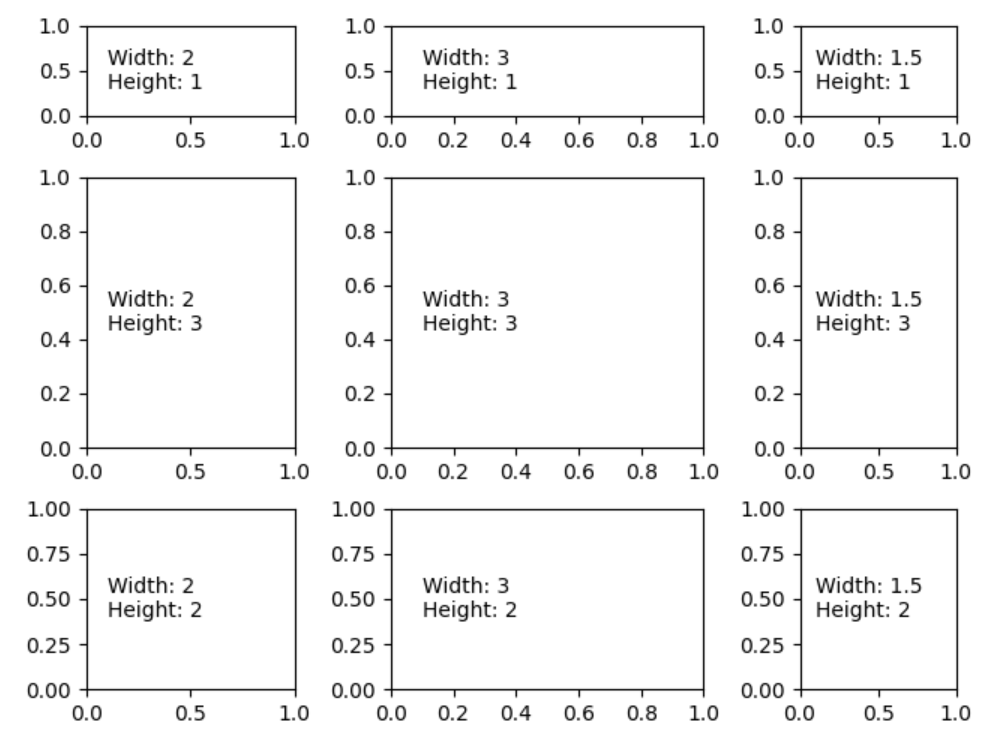

GridSpec(1, 2, height_ratios=[6], width_ratios=[10, 5])


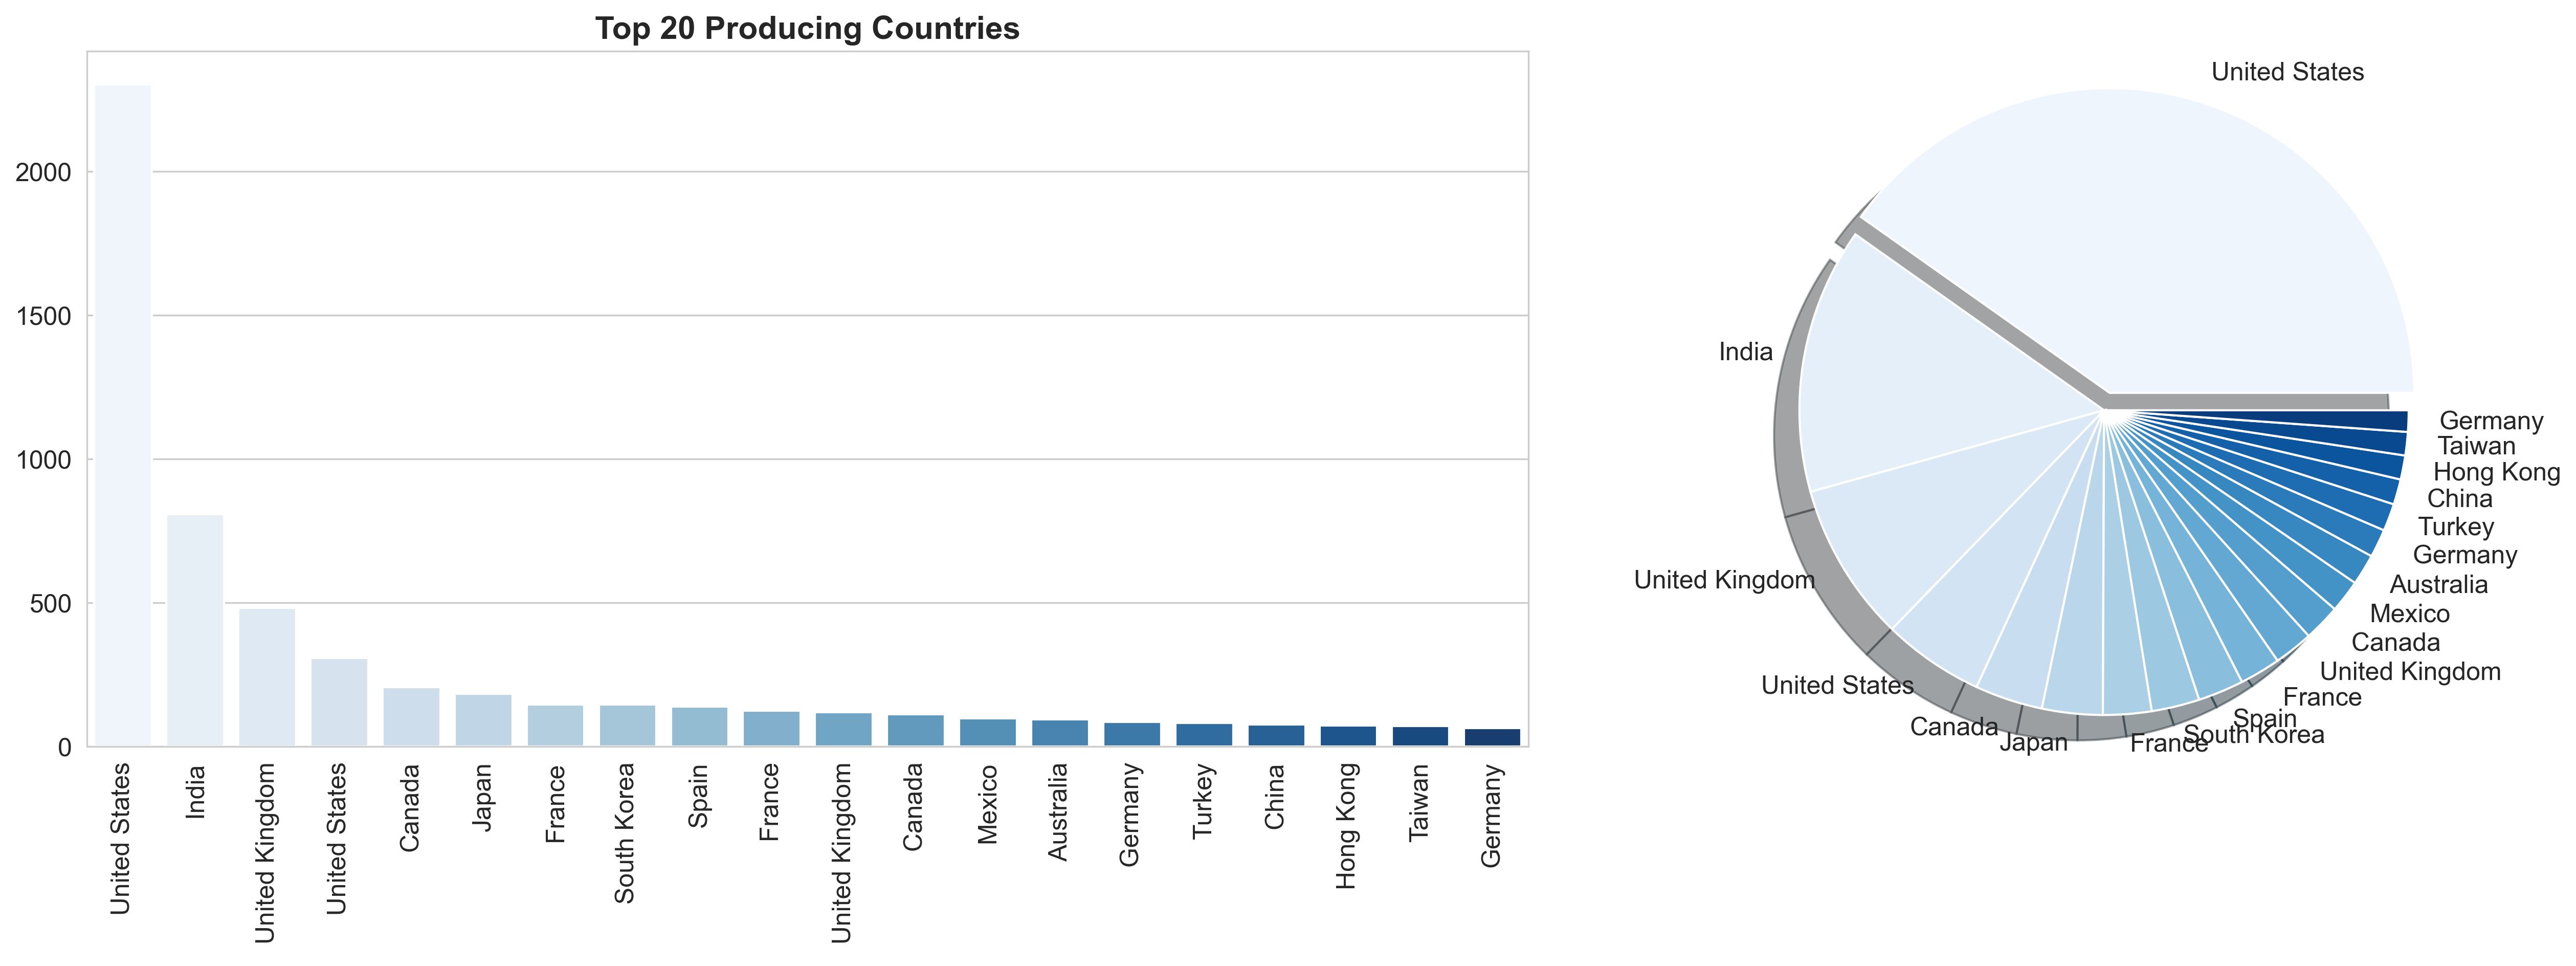

In [100]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))

## Create empty boxes to put the plots
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])
print (gs)

# Bar plot
ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="Blues")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 Producing Countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06


# Pie chart
ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("Blues", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

From the above it can be seen that the top 2 producing countries are USA and India. 

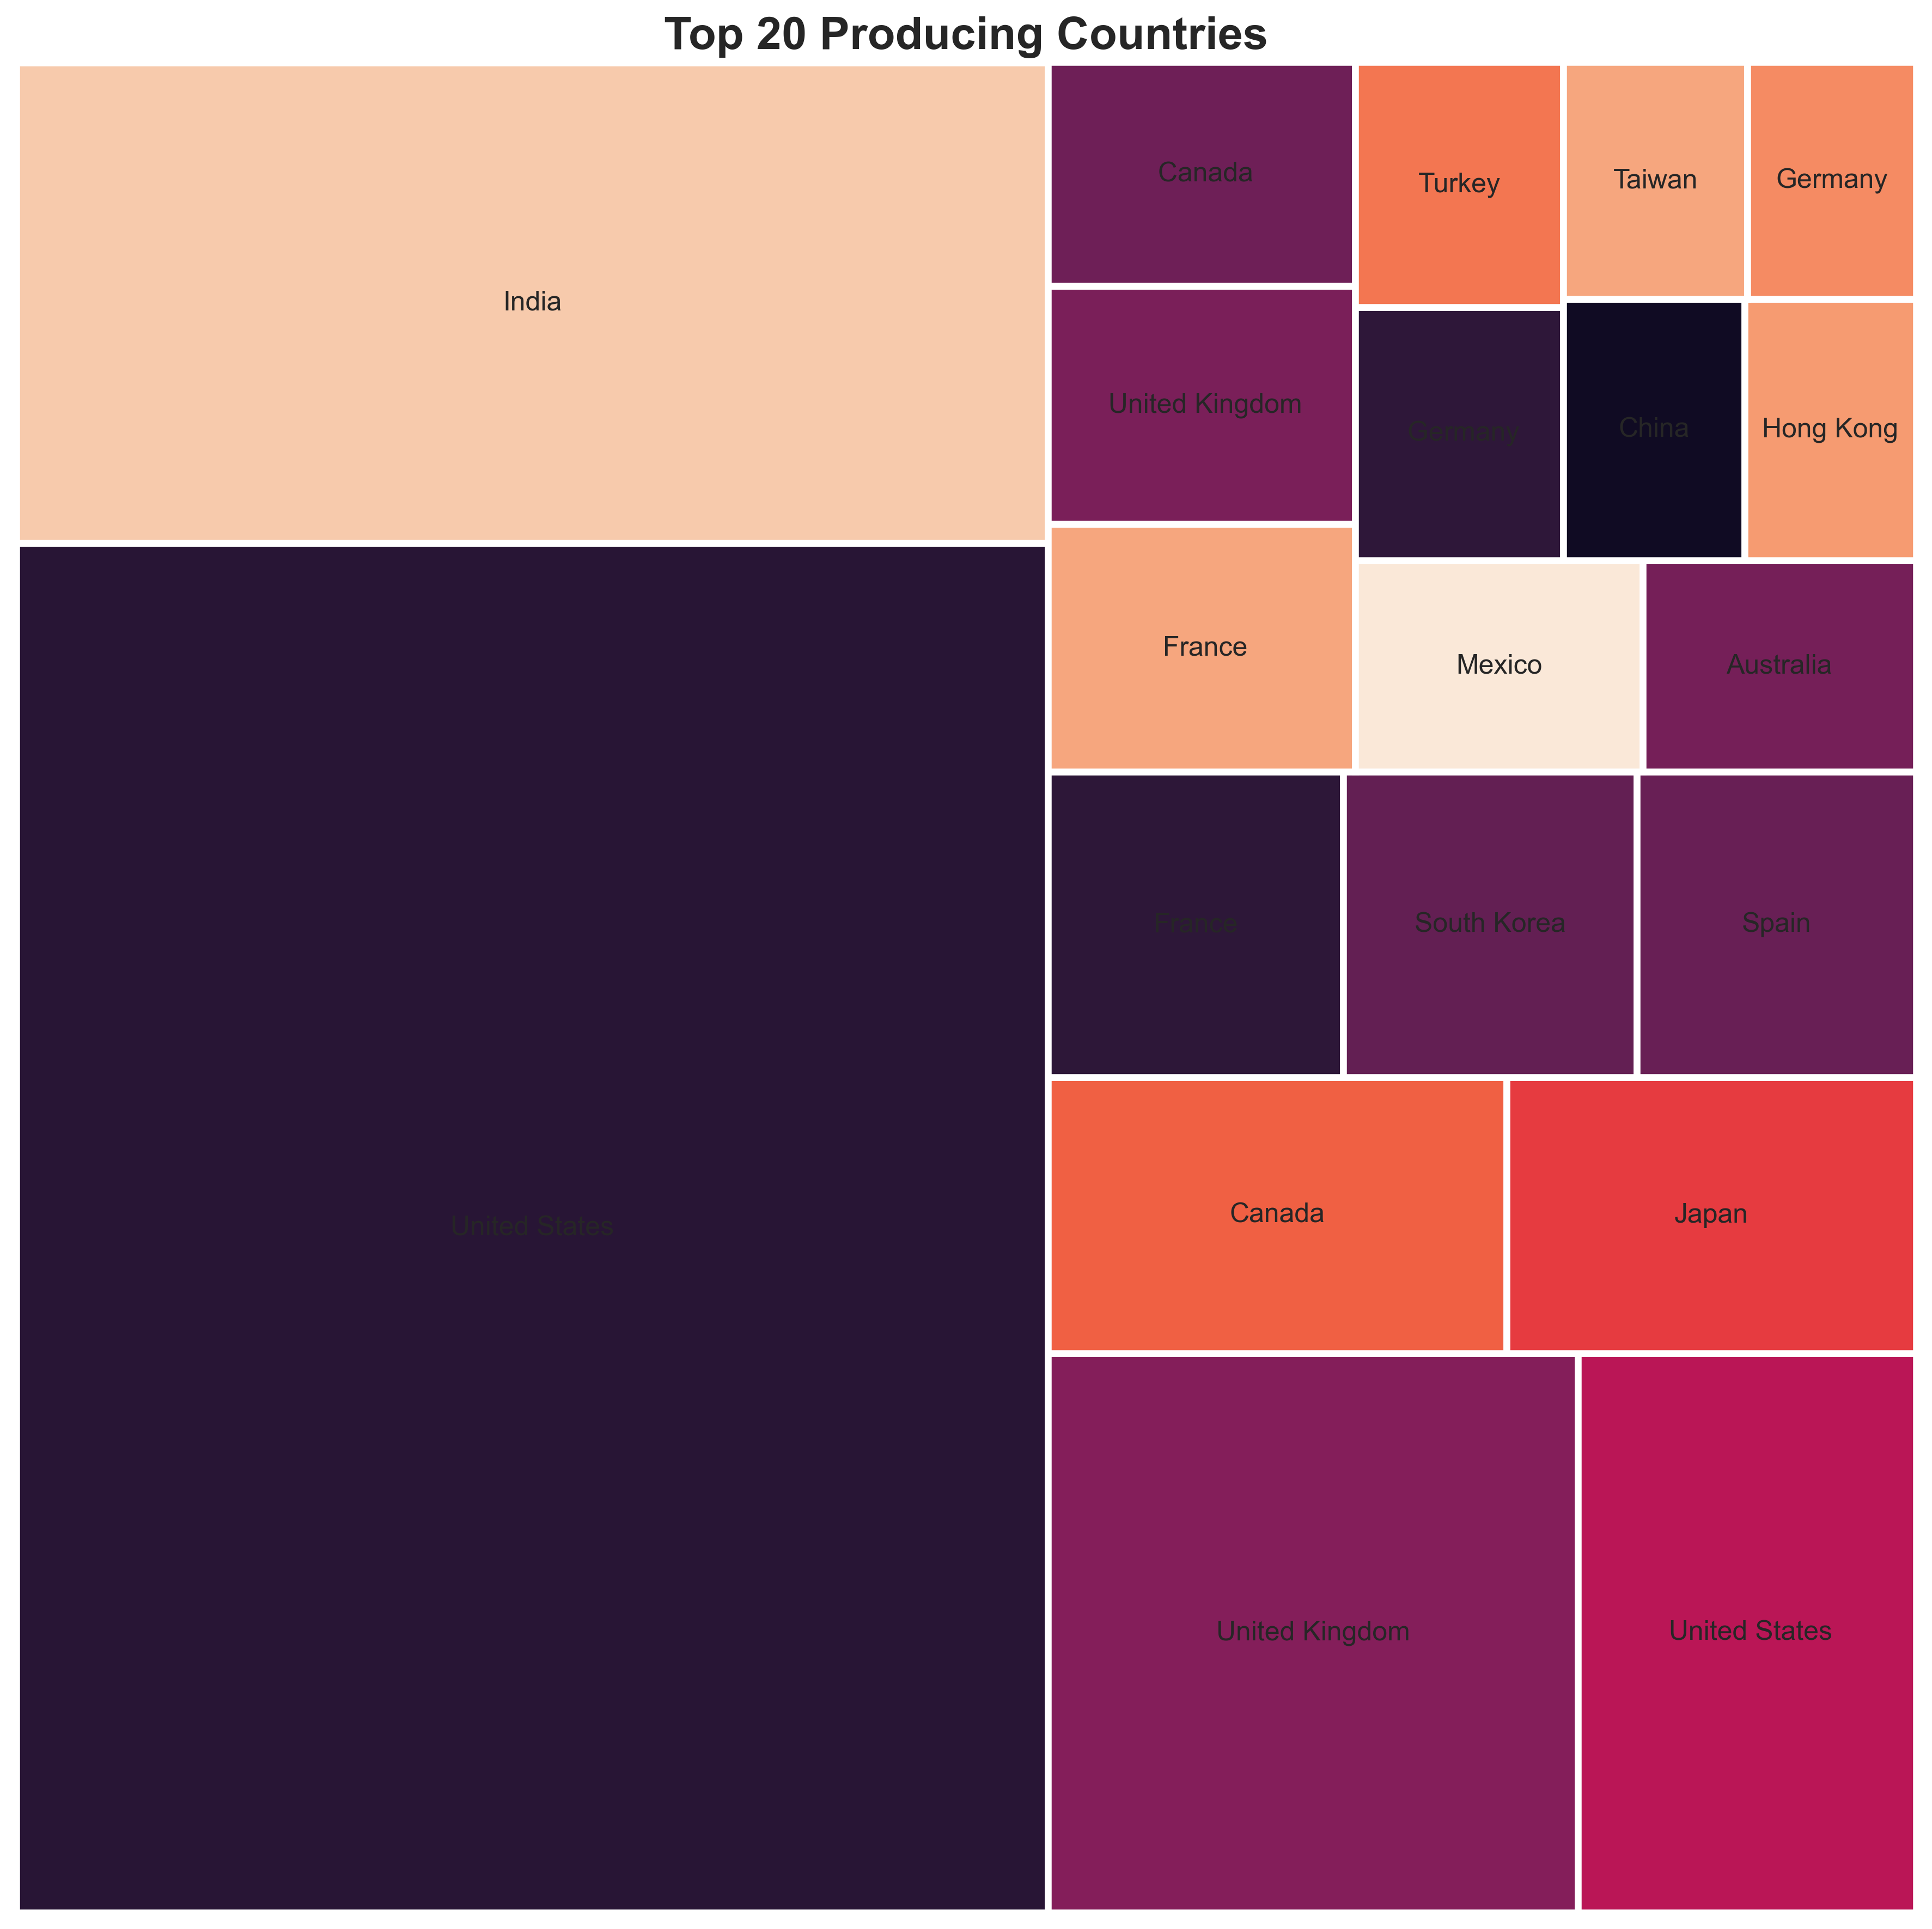

In [101]:
# Using squarify library

import squarify

fig = plt.figure(figsize = (15,15))
squarify.plot(sizes = top20_country.values, label = top20_country.index, linewidth = 3)
plt.title('Top 20 Producing Countries', fontsize = 20, fontweight = 'bold')
plt.axis('off')
plt.show()



The colors are random and does not represent the rank of the countries only the **size** does. The colors can be set to make it easier to tell the treemap apart.

Seaborn color_palette [here](https://seaborn.pydata.org/tutorial/color_palettes.html)


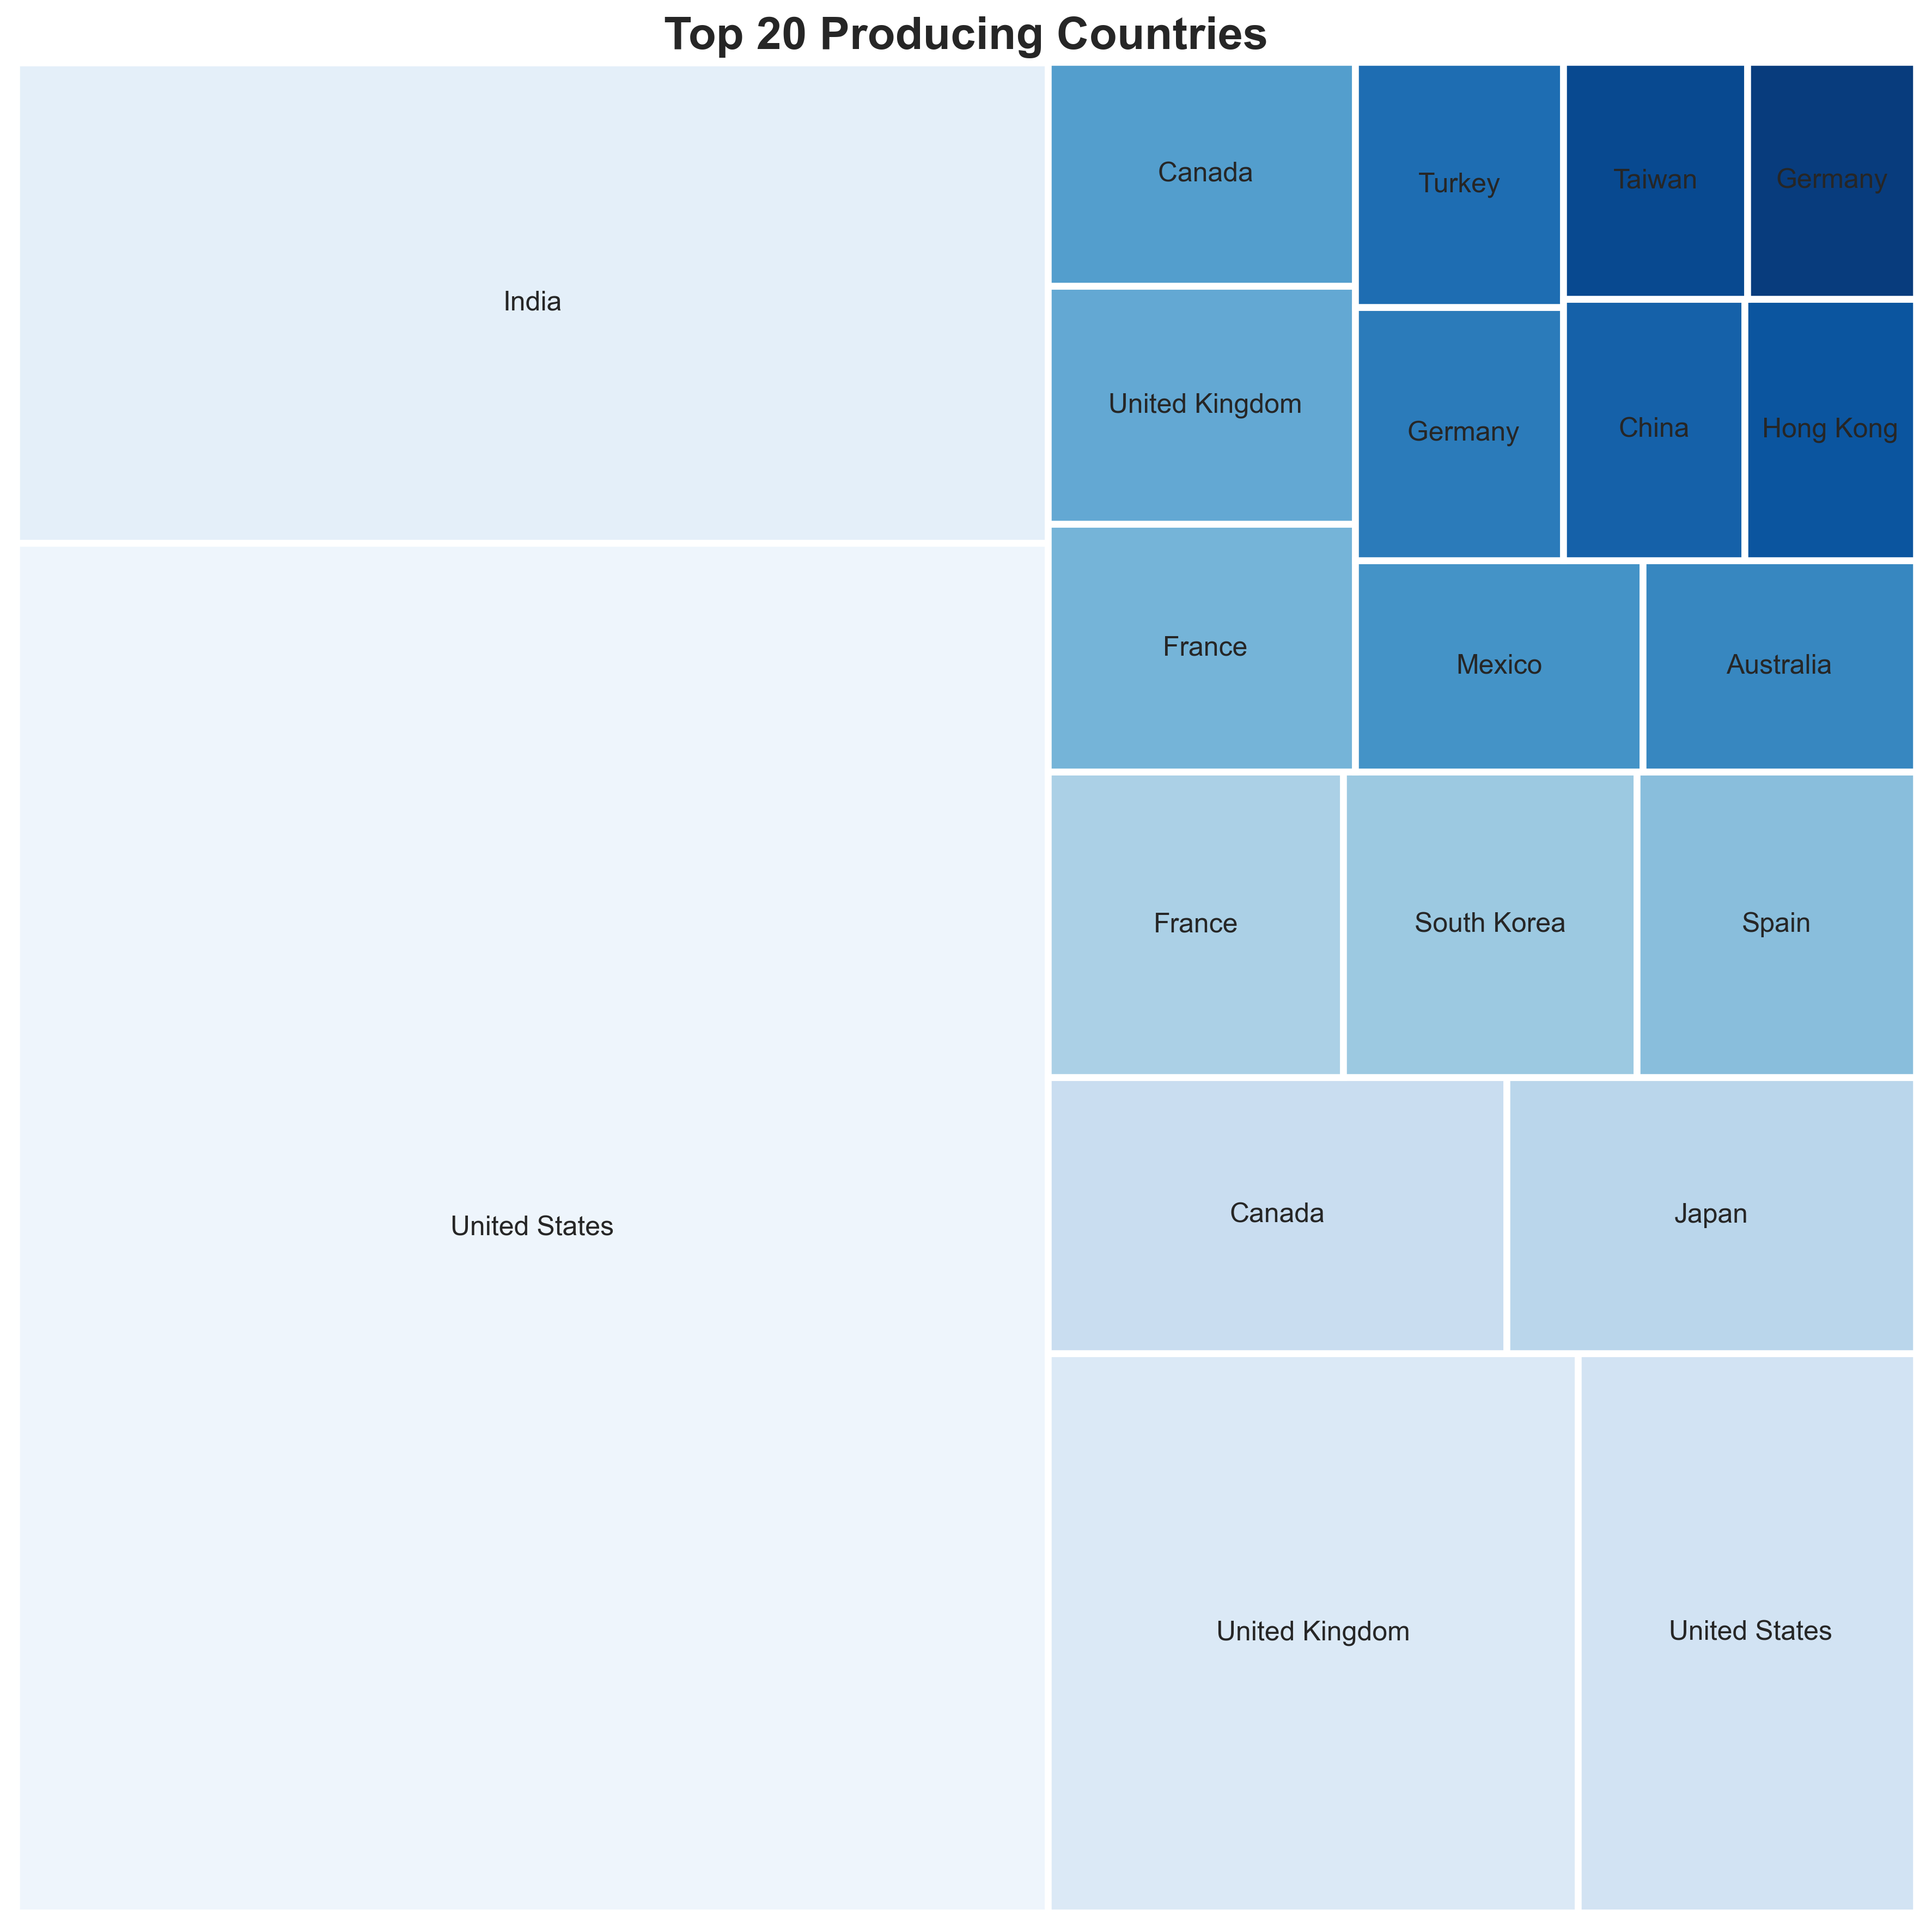

In [102]:
import squarify

fig = plt.figure(figsize = (15,15))
squarify.plot(sizes = top20_country.values, color=sns.color_palette("Blues", n_colors=20), label = top20_country.index, linewidth = 3)
plt.title('Top 20 Producing Countries', fontsize = 20, fontweight = 'bold')
plt.axis('off')
plt.show()

## Using Streamgraph

**Steps:** [Read More](https://altair-viz.github.io/gallery/streamgraph.html)

1) Prep data

2) Plot graph

- 'center' [here](https://vega.github.io/vega-lite/docs/stack.html#streamgraph)

- 'normalize' [here](https://vega.github.io/vega-lite/docs/stack.html#normalized) and [here better](https://altair-viz.github.io/gallery/normalized_stacked_area_chart.html)
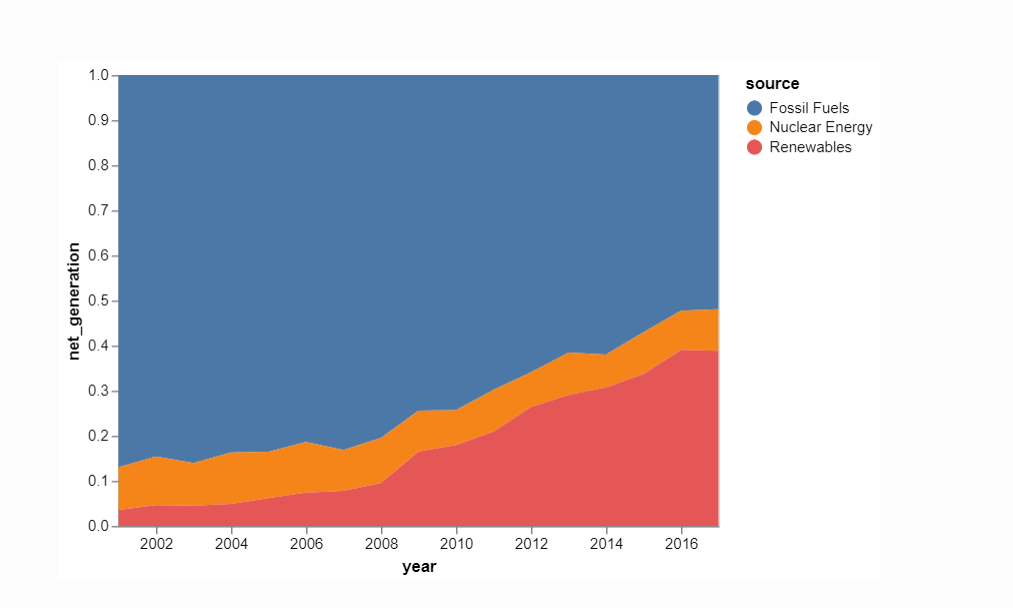

Sample Code
> import altair as alt
> from vega_datasets import data

> source = data.unemployment_across_industries.url

> alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

In [104]:
# Import Library
import altair as alt

# Prep data
# Replace left space_comma and right_space comma with just no_space comma
df['country'] = df['country'].dropna().apply(lambda x:x.replace(" ,", ",").replace(", ", ",").split(","))

# Code already run once

AttributeError: 'list' object has no attribute 'replace'

In [106]:
# Method 1

import numpy as np
lst_col = 'country'
df2 = pd.DataFrame({
      col :  np.repeat(df[col].values, df[lst_col].str.len())
      for col in df.columns.drop(lst_col)} #Method 1
    ).assign(**{lst_col:np.concatenate(df[lst_col].values)})[df.columns.tolist()]

In [111]:
df2.head(2)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  81145628  Movie  Norm of the North: King Sized Adventure   

                   director  \
0  Richard Finn, Tim Maltby   
1  Richard Finn, Tim Maltby   

                                                cast        country  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...  United States   
1  Alan Marriott, Andrew Toth, Brian Dobson, Cole...          India   

          date_added  release_year rating duration  \
0  September 9, 2019          2019  TV-PG   90 min   
1  September 9, 2019          2019  TV-PG   90 min   

                            listed_in  \
0  Children & Family Movies, Comedies   
1  Children & Family Movies, Comedies   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...        2019  
1  Before planning an awesome wedding for his gra...        2019

In [110]:
df.head(2)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   

                   director  \
0  Richard Finn, Tim Maltby   
1                      NULL   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   

                                      country         date_added  \
0  [United States, India, South Korea, China]  September 9, 2019   
1                            [United Kingdom]  September 9, 2016   

   release_year rating duration                           listed_in  \
0          2019  TV-PG   90 min  Children & Family Movies, Comedies   
1          2016  TV-MA   94 min                     Stand-Up Comedy   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...        2019  
1  Jandino Asporaat riffs on the challenges of ra...        2016

In [119]:
# Method 2

import numpy as np
df3 = pd.DataFrame({
      col :  np.repeat(df[col].values, df['country'].str.len())
      for col in df.columns.drop('country')} #Method 2
    ).assign(**{"country":np.concatenate(df['country'].values)})[df.columns.tolist()]

In [120]:
df2 == df3

show_id  type  title  director  cast  country  date_added  release_year  \
0        True  True   True      True  True     True        True          True   
1        True  True   True      True  True     True        True          True   
2        True  True   True      True  True     True        True          True   
3        True  True   True      True  True     True        True          True   
4        True  True   True      True  True     True        True          True   
...       ...   ...    ...       ...   ...      ...         ...           ...   
7653     True  True   True      True  True     True        True          True   
7654     True  True   True      True  True     True        True          True   
7655     True  True   True      True  True     True        True          True   
7656     True  True   True      True  True     True        True          True   
7657     True  True   True      True  True     True        True          True   

      rating  duration  listed_in  description  year_added  
0       True      True       True         True        True  
1       True      True       True         True        True  
2       True      True       True         True        True  
3       True      True       True         True        True  
4       True      True       True         True        True  
...      ...       ...        ...          ...         ...  
7653    True      True       True         True        True  
7654    True      True       True         True        True  
7655    True      True       True         True        True  
7656    True      True       True         True        True  
7657    True      True       True         True        True  

[7658 rows x 13 columns]

### Plot Centralised Stream

In [128]:
year_country = df2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
print (year_country)

# Create a new column that matches with the names of the top 20 countries
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)
print (year_country)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

# Plot Centralised Stream

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redblue'), # https://altair-viz.github.io/user_guide/generated/core/altair.Diverging.html
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

     year_added        country  counts
0          2008  United States       2
1          2009        Denmark       1
2          2009  United States       1
3          2010  United States       1
4          2011  United States      12
..          ...            ...     ...
357        2020         Russia       1
358        2020      Singapore       1
359        2020   South Africa       1
360        2020         Taiwan       1
361        2020   West Germany       1

[362 rows x 3 columns]
     year_added        country  counts  top20
0          2008  United States       2   True
1          2009        Denmark       1  False
2          2009  United States       1   True
3          2010  United States       1   True
4          2011  United States      12   True
..          ...            ...     ...    ...
357        2020         Russia       1  False
358        2020      Singapore       1  False
359        2020   South Africa       1  False
360        2020         Taiwan       1   True
36

alt.Chart(...)

### Plot Normalised Area Chart

In [131]:
# Using Normalise Streamgraph
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redblue'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

Does this mean that USA has been producing less TV Shows and Movies than India, United Kingdom and other countries?

We can't really tell from the graph, a linear plot would represent that. The 2 above Streamgraphs simply shows that the amount of total number of shows from United States now represent a smaller fraction of the **total** Netflix shows as compared to before. 

This is a result of other countries producing more content

### Choropleth Graph

In [134]:
import plotly.express as px
year_country2 = df2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show()

In [135]:
import plotly.express as px
year_country2 = df2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

## Parameters
## px.choropleth (df, locations = 'country', color= 'counts', locationmode = 'country names',
## animation_frame = 'date', hover_name = 'country')
fig = px.choropleth(year_country2, locations="country", color="counts", #color label
                    locationmode='country names',
                    animation_frame='year_added',
                    hover_name = 'country'
                   )

fig.update_layout(title='Comparison by country')
fig.show()

## Relationship between Movie and Genre

In [190]:
from sklearn.preprocessing import MultiLabelBinarizer 

# Create a function to plot
def relation_heatmap (df, title):
    # Create new column
    df['genre'] = df['listed_in'].apply(lambda x : x.replace(" ,", ",").replace(", ", ",").split(","))
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

<ipython-input-190-f6f1d4a12ac6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 20 types in the Netflix Movie Dataset


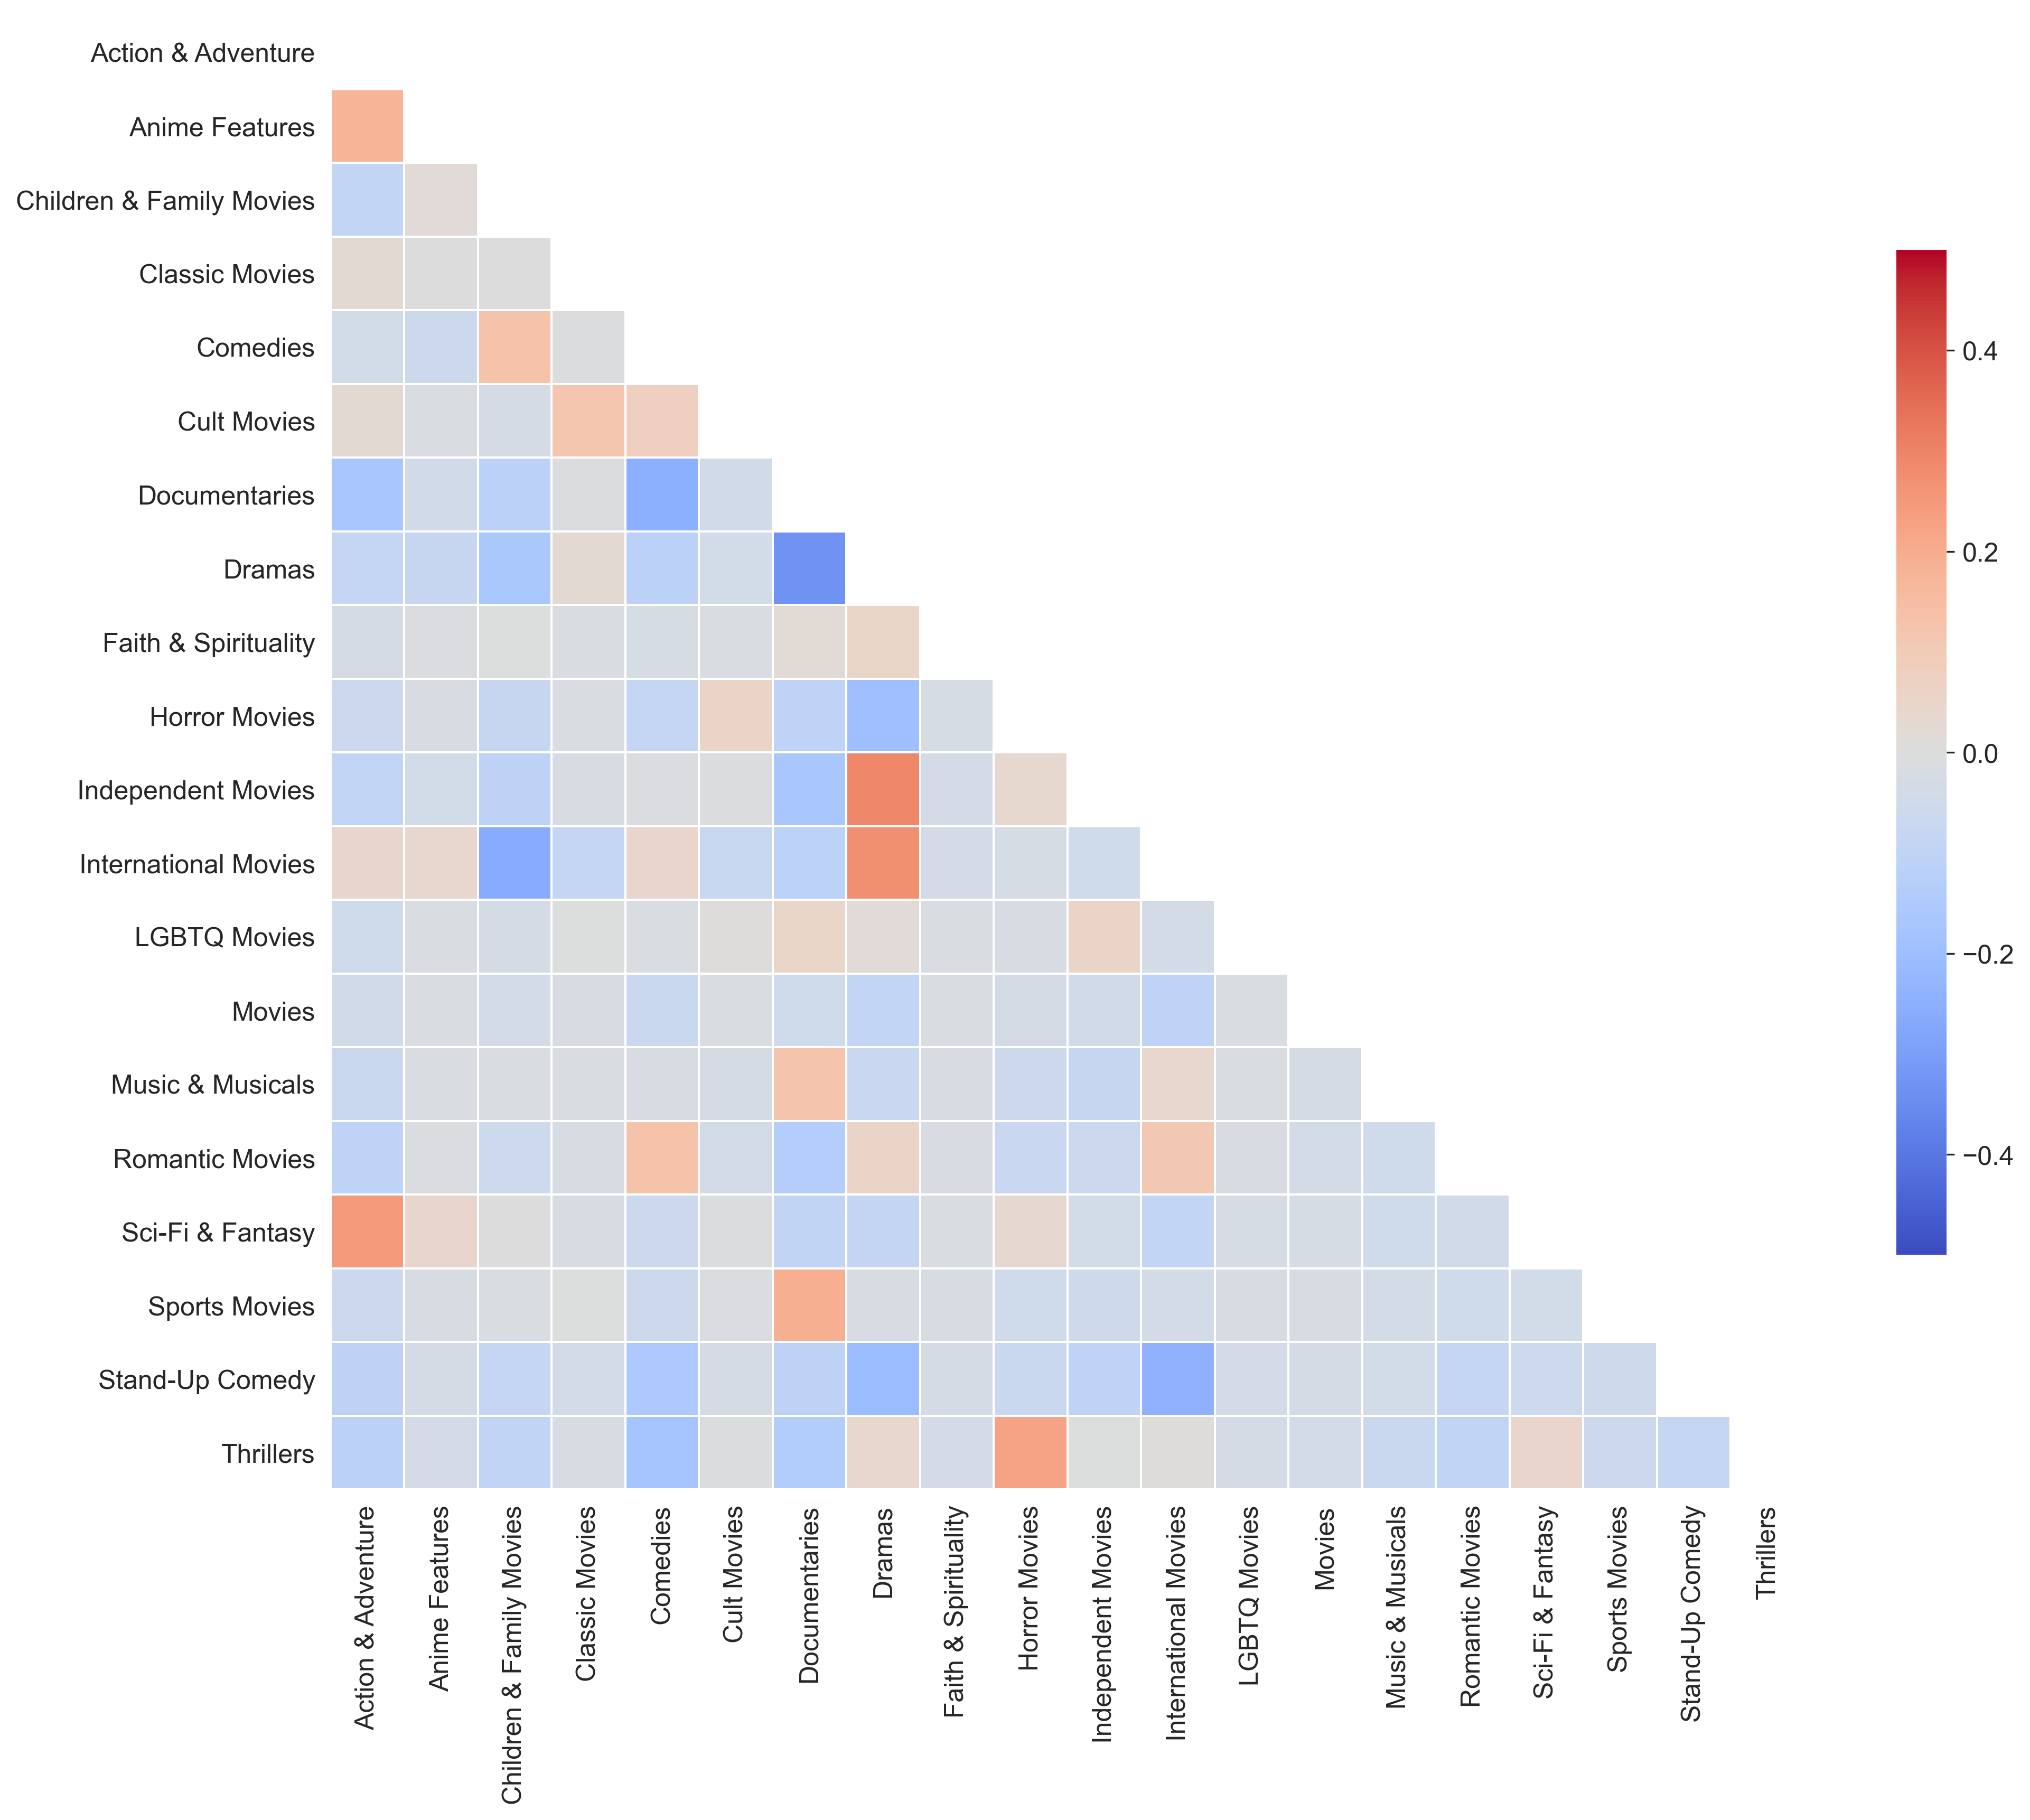

In [191]:
relation_heatmap(movie, "Movie")

<ipython-input-190-f6f1d4a12ac6>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



There are 22 types in the Netflix TV Show Dataset


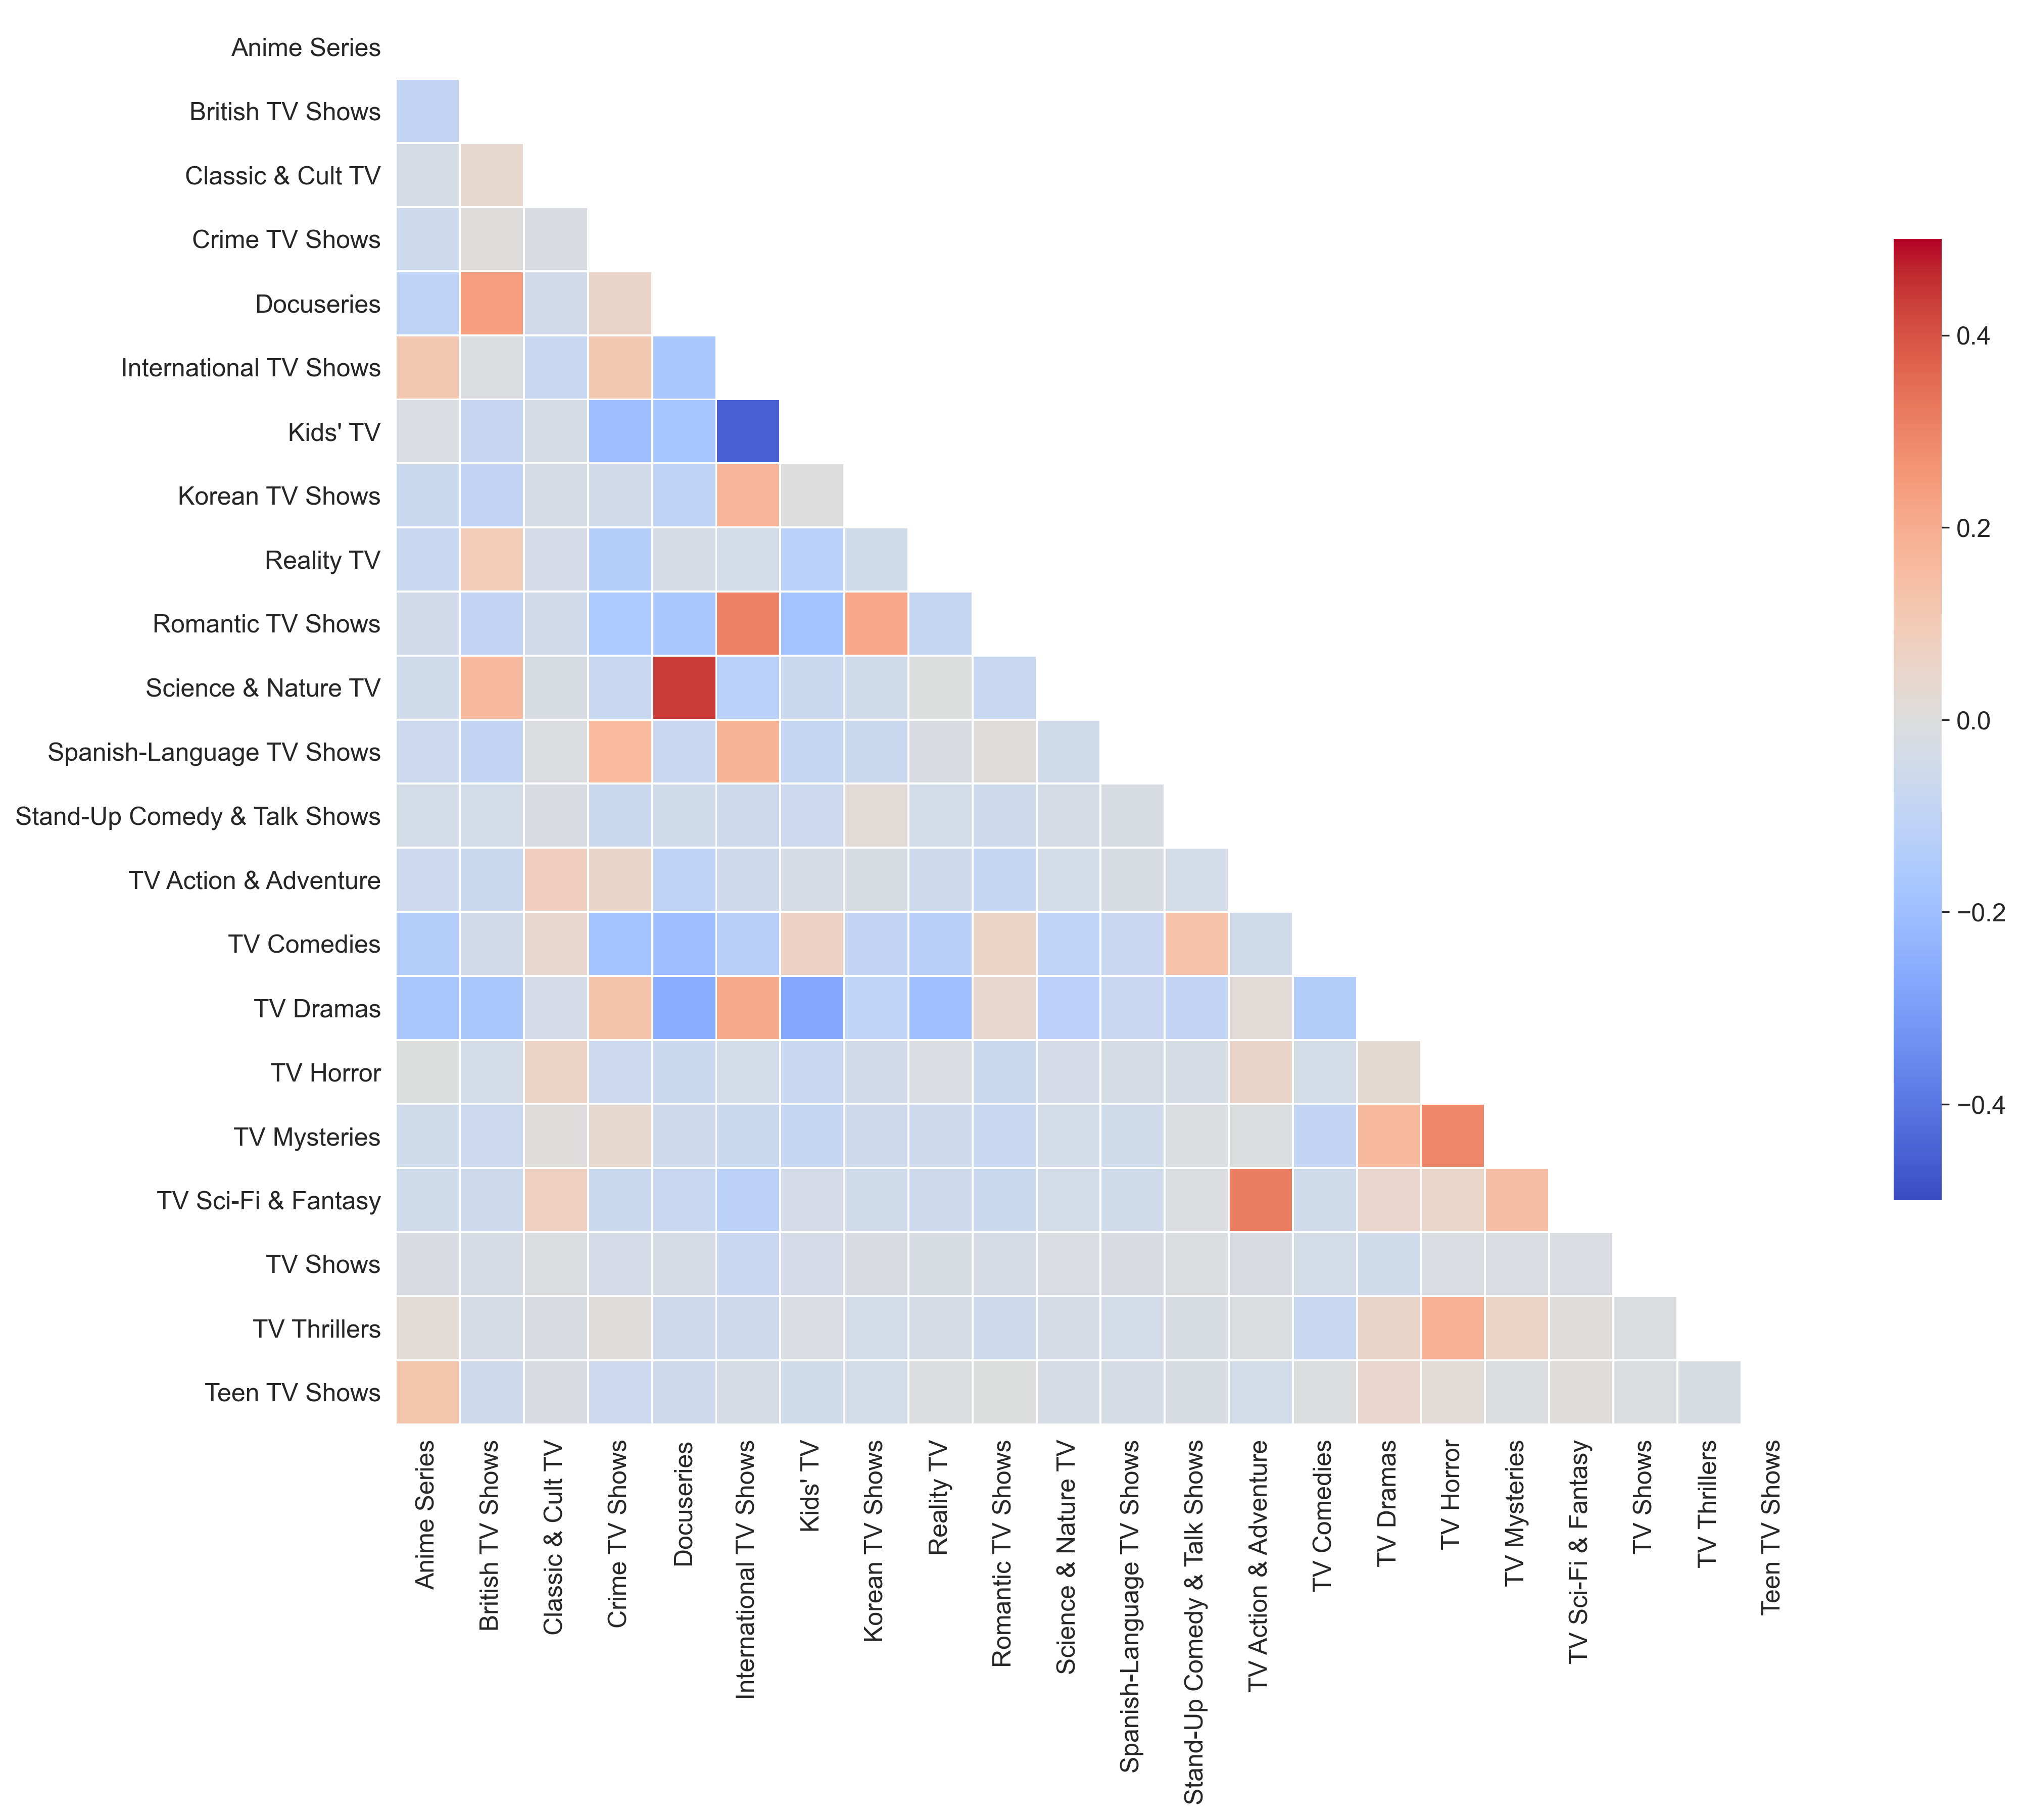

In [192]:
relation_heatmap(tv_show, "TV Show")

TV Show has lesser 'negative correlation' than Movies as seen from the amount of 'blues boxes' it has. 

Science and Nature TV has the strongest correlation with Docuseries

## Rating System - Bar Chart

[Pandas Tips and Tricks](https://towardsdatascience.com/pandas-tips-and-tricks-33bcc8a40bb9)

We can also create features for the summer activities counts per person, by applying unstack on the above code. Unstack switches the rows to columns to get the activity counts as features. By doing unstack we are transforming the last level of the index to the columns. All the activities values will now be the columns of a the dataframe and when a person has not done a certain activity this feature will get Nan value. Fillna fills all these missing values (activities which were not visited by the person) with 0.

#### unstack
> df.groupby('name')['activity'].value_counts().unstack().fillna(0) <br>
> Eg
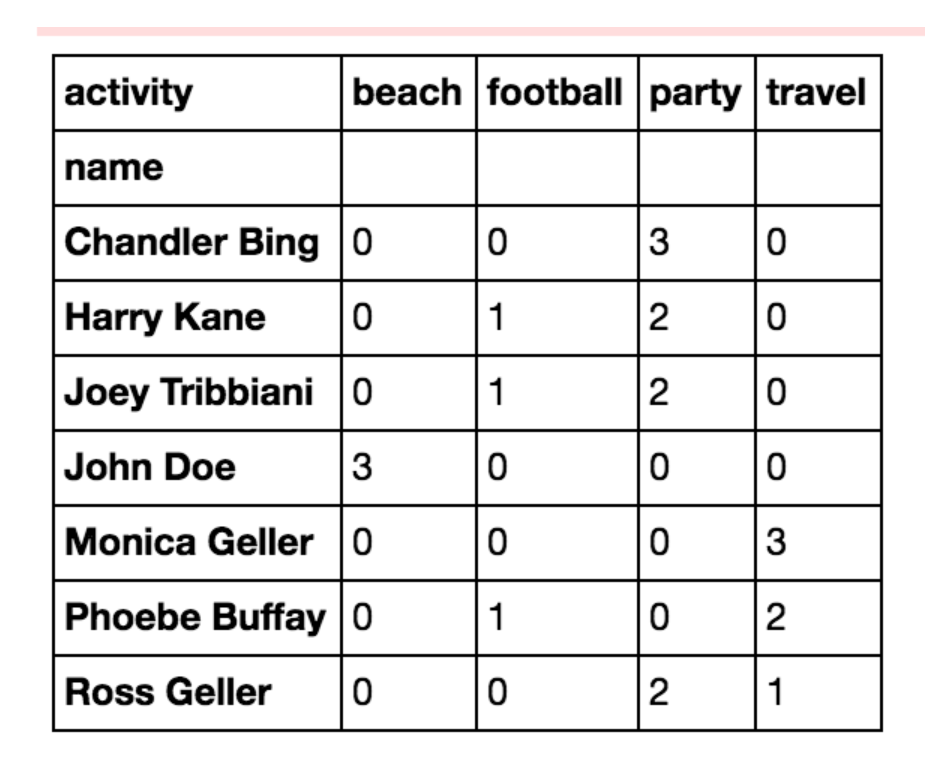

#### diff
> df = df.sort_values(by=['name','timestamp']) <br>
> df['time_diff'] = df.groupby('name')['timestamp'].diff()

In [236]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

## Select the two columns 'rating' and 'type'
## Groupby 'type' and count the 'rating' -> this is multiindex

rating_data = df[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].transpose()
rating_data
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12
print (rating_data)

      rating     cnt  type
0          G    36.0     0
1       TV-Y    41.0     0
2       TV-G    80.0     0
3         PG   183.0     0
4      TV-Y7    69.0     0
5   TV-Y7-FV    27.0     0
6      TV-PG   432.0     0
7      PG-13   286.0     0
8      TV-14  1038.0     0
9          R   506.0     0
10     NC-17     2.0     0
11     TV-MA  1348.0     0
12         G     1.0     1
13      TV-Y   102.0     1
14      TV-G    69.0     1
15        PG     1.0     1
16     TV-Y7   100.0     1
17  TV-Y7-FV    68.0     1
18     TV-PG   269.0     1
19     PG-13     0.0     1
20     TV-14   660.0     1
21         R     2.0     1
22     NC-17     0.0     1
23     TV-MA   679.0     1


In [237]:
##  Completely Lost

df['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)